# Logistic Regression

In this notebook, we will make a logistic regression classifier to seperate red dots vs blue dots using pytorch

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
# Loading the data i.e, features and labels

features, labels = make_classification(n_samples=500, n_features=2, n_classes=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=100)

In [3]:
# Converting the data into torch.Tensors

features = torch.from_numpy(features).float()
labels = torch.from_numpy(labels).float().reshape(len(labels), 1)

features.shape, labels.shape

(torch.Size([500, 2]), torch.Size([500, 1]))

In [4]:
# Spliting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=999)

# Printing some details
print(f"Number of training examples: m_train = {X_train.shape[0]}")
print(f"Number of testing examples: m_test = {X_test.shape[0]}")
print(f"The train_set_X_shape: {X_train.shape}")
print(f"The train_set_y_shape: {y_train.shape}")
print(f"The test_set_X_shape: {X_test.shape}")
print(f"The test_set_y_shape: {y_test.shape}")
print(f"The data-type of the 1st training example is: {X_train[0].dtype}")

Number of training examples: m_train = 400
Number of testing examples: m_test = 100
The train_set_X_shape: torch.Size([400, 2])
The train_set_y_shape: torch.Size([400, 1])
The test_set_X_shape: torch.Size([100, 2])
The test_set_y_shape: torch.Size([100, 1])
The data-type of the 1st training example is: torch.float32


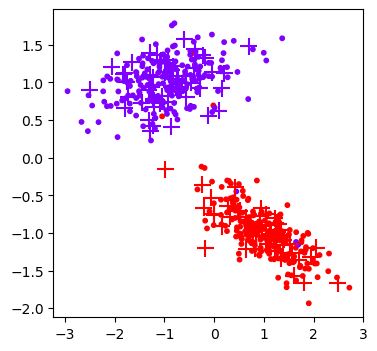

In [5]:
#Ploting the data
plt.figure(figsize=(4,4))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=10, cmap='rainbow')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='+', s=150, cmap='rainbow');

### Defining the model

In [6]:

class LogisticRegression(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.layer0 = nn.Linear(in_features=num_features, out_features=1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.layer0(x)
        x = self.sigmoid(x)
        return x
    
model = LogisticRegression(num_features=2)

In [7]:
def calculate_accuracy(preds, actuals):
    "This function used to calculate accuracy"
    with torch.no_grad():
        rounded_preds = torch.round(preds)
        num_correct = torch.sum(rounded_preds == actuals)
        accuracy = num_correct/len(preds)
    return accuracy

In [8]:
LEARNING_RATE = 0.001
EPOCHS = 2000

loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr= LEARNING_RATE)


train_losses = []
test_losses = []
train_accs = []
test_accs = []

for epoch in range(EPOCHS):
    # Forward Propagation
    train_preds = model(X_train)
    train_loss = loss_function(train_preds, y_train)
    
    #Predicting on test data
    with torch.no_grad():
        test_preds = model(X_test)
        test_loss = loss_function(test_preds, y_test)
        
    # Calculate the accuracy
    train_acc = calculate_accuracy(train_preds, y_train)
    test_acc = calculate_accuracy(test_preds, y_test)
    
    #Back Propagation
    optimizer.zero_grad()
    train_loss.backward()
    
    # Gradient descent step
    optimizer.step()
    
    # Store training history
    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())
    train_accs.append(train_acc.item())
    test_accs.append(test_acc.item())
    
    # Print training data #g
    if epoch%100==0:
        print(f'Epoch: {epoch} \t|' \
            f' Train loss: {np.round(train_loss.item(),3)} \t|' \
            f' Test loss: {np.round(test_loss.item(),3)} \t|' \
            f' Train acc: {np.round(train_acc.item(),2)} \t|' \
            f' Test acc: {np.round(test_acc.item(),2)}')

Epoch: 0 	| Train loss: 0.662 	| Test loss: 0.656 	| Train acc: 0.57 	| Test acc: 0.61
Epoch: 100 	| Train loss: 0.62 	| Test loss: 0.615 	| Train acc: 0.89 	| Test acc: 0.93
Epoch: 200 	| Train loss: 0.583 	| Test loss: 0.578 	| Train acc: 0.96 	| Test acc: 0.99
Epoch: 300 	| Train loss: 0.549 	| Test loss: 0.545 	| Train acc: 0.98 	| Test acc: 0.99
Epoch: 400 	| Train loss: 0.519 	| Test loss: 0.515 	| Train acc: 0.98 	| Test acc: 0.99
Epoch: 500 	| Train loss: 0.492 	| Test loss: 0.488 	| Train acc: 0.98 	| Test acc: 0.99
Epoch: 600 	| Train loss: 0.468 	| Test loss: 0.464 	| Train acc: 0.98 	| Test acc: 0.99
Epoch: 700 	| Train loss: 0.446 	| Test loss: 0.442 	| Train acc: 0.98 	| Test acc: 0.99
Epoch: 800 	| Train loss: 0.426 	| Test loss: 0.422 	| Train acc: 0.98 	| Test acc: 0.99
Epoch: 900 	| Train loss: 0.408 	| Test loss: 0.404 	| Train acc: 0.98 	| Test acc: 0.99
Epoch: 1000 	| Train loss: 0.392 	| Test loss: 0.387 	| Train acc: 0.98 	| Test acc: 0.99
Epoch: 1100 	| Train lo

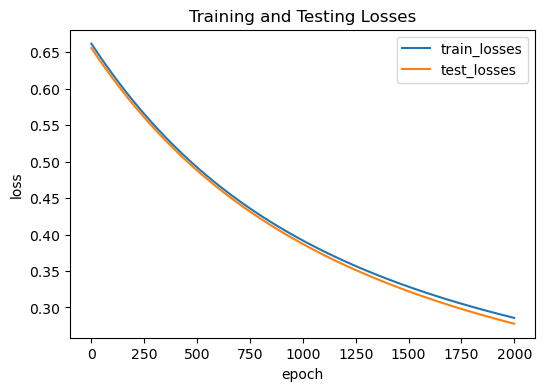

In [9]:
plt.figure(figsize=(6,4))
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train_losses', 'test_losses'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and Testing Losses')
plt.show()

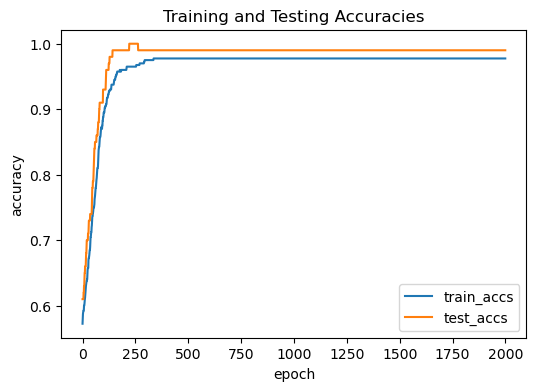

In [10]:
plt.figure(figsize=(6,4))
plt.plot(train_accs)
plt.plot(test_accs)
plt.legend(['train_accs', 'test_accs'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training and Testing Accuracies')
plt.show()

In [11]:
with torch.no_grad():
    param_vector = torch.nn.utils.parameters_to_vector(model.parameters())
    
print(param_vector)

tensor([ 0.4135, -0.8358, -0.0665])


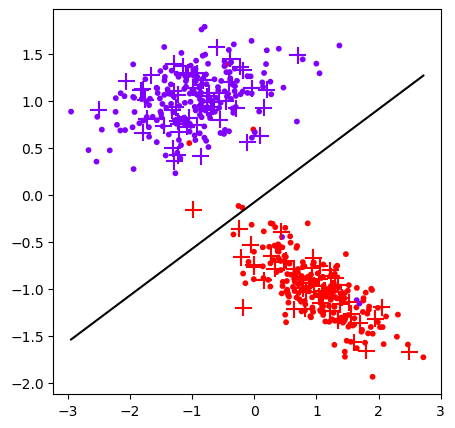

In [12]:
def show_decision_boundary():
    weight_0 = param_vector[0]
    weight_1 = param_vector[1]
    bias = param_vector[2]
    
    #a
    m = -(bias/weight_1) / (bias/weight_0)
    c = -bias/weight_1

    x_line = np.linspace(X_train[:,0].min(), X_train[:,0].max(), 400)
    y_line = m*x_line + c

    plt.figure(figsize=(5,5))
    plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=10, cmap='rainbow')
    plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='+', s=150, cmap='rainbow')
    plt.plot(x_line, y_line, c='black')

show_decision_boundary()